# Music Recommendation Analysis 

1. Univariate Analysis
- What is the most popular genre ?
- Which artists have more than 50 songs? Who are the top 5 Artists?
- How many different song topics are there?

2. Bivariate Analysis
- How has the genre of music change over the years?
- How has the top 5 artists songs change over the years?
- How has song topics change over the years?

3. Multivariate Analysis
- How does the lyrical features effect the genre?
- How does the lyrical features effect the top 5 artists?
- What is the correlation between lyrical features, length and age?

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [381]:
music_df = pd.read_csv("/Users/sa17/Desktop/Music-Recommendation-Algorithm/data/train.csv")

music_df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,obscene,0.014286
28358,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,obscene,0.014286
28359,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,obscene,0.014286
28360,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,obscene,0.014286


- artist_name: The name of the artist

- track_name: The name of the song

- release_date: When this song was released

- genre: The categorical genre of this song

- lyrics: The pre-tokenized lyrics of this song. Disclaimer: note that as this is real-world data, lyrical content is often obscene. 

- len:  The number of words in the lyrics of this song

- dating: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with dating.

- violence: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with violence.

- world/life: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the world or life in general terms.

- night/time: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do night-life or time.

- shake the audience: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with provocative feeling.

- family/gospel: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with family-oriented content or the gospel.

- romantic: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with romantic feeling.

- communication: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with communication (either in romantic terms or otherwise).

- obscene: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with obscene content (money, rockstar-lifestyle, etc).

- music: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with music (music about music, basically).

- movement/places: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with movement or various locations.

- light/visual perceptions: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the sun or other physical weather-related patterns.

- family/spiritual: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the importance of family or spirituality.

- sadness: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the importance of family or spirituality.

- feelings: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with emotions, either positive or negative.

- topic: The categorical label of lyrical content

- age: A score from 0 to 1 expressing how “old” a song is from our perspective. 1 being the oldest, and 0 being the newest.



In [382]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

In [383]:
music_df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,42948.166878,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,24747.811462,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,20393.500000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,45407.000000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,64089.500000,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


In [384]:
music_df.shape

(28362, 24)

In [385]:
music_df.isna().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
sadness                     0
feelings                    0
topic                       0
age                         0
dtype: int64

## 1. Univarite Analysis

What is the most popular genre ?

In [386]:
genres = music_df["genre"].value_counts()
genres

genre
pop        7038
country    5444
blues      4603
rock       4032
jazz       3844
reggae     2497
hip hop     904
Name: count, dtype: int64

Text(0, 0.5, 'Number of Songs')

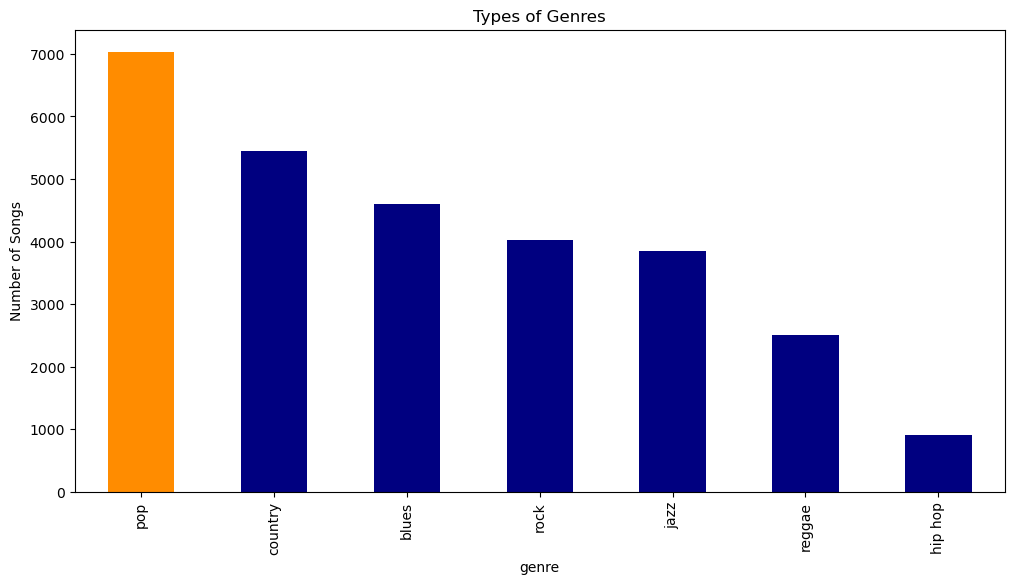

In [387]:
most_popular = genres.max()

# Assign colors: orange for the max value, blue for others
colors = ["darkorange" if count == most_popular  else "navy" for count in genres]

# Plot the types of genres
plt.figure(figsize=(12, 6))
genres.plot(kind='bar', color=colors)
plt.title("Types of Genres")
plt.ylabel("Number of Songs")

Pop is the most popular genre. 7 times more than the least popular genre hip hop.

Which artists have more than 50 songs? Who are the top 5 Artists?

In [388]:
artist = music_df["artist_name"].value_counts().to_frame(name="count")

artist

,count
artist_name,
johnny cash,190
ella fitzgerald,188
dean martin,146
willie nelson,131
george jones,107
...,...
stigmato inc,1
plej,1
slow train soul,1


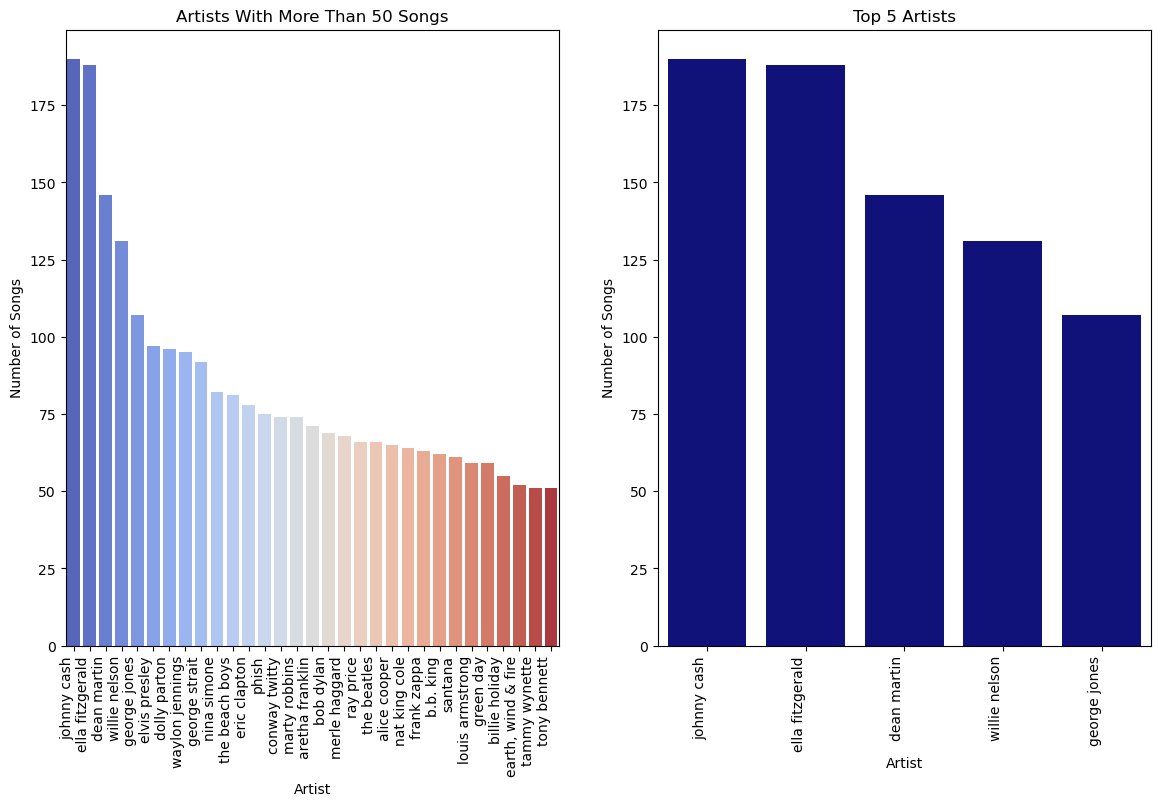

In [389]:
# Plot artists with more than 50 songs
artist_50 = artist[artist["count"] >= 50]

plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
sns.barplot(data=artist_50, x="artist_name", y="count", hue="artist_name", palette="coolwarm")
plt.title("Artists With More Than 50 Songs")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.xticks(rotation=90, ha="right")

# Plot top 5 artsts 
top_5 = artist_50.head()

plt.subplot(1, 2, 2)
sns.barplot(data=top_5, x="artist_name", y="count", color="darkblue")
plt.title("Top 5 Artists")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.xticks(rotation=90, ha="right")

plt.show()

Out of 5424 artists only 31 artists have more than 50 songs. The top 5 artists are Johnny Cash, Ella Fitzgerald, Dean Martin, Willie Nelson and Georgie Jones. They are the only artists with more than 100 songs.

How many different song topics are there?

In [390]:
topics = music_df["topic"].value_counts().to_frame(name="count")

topics

,count
topic,
sadness,6094
violence,5707
world/life,5419
obscene,4881
music,2303
night/time,1823
romantic,1523
feelings,612


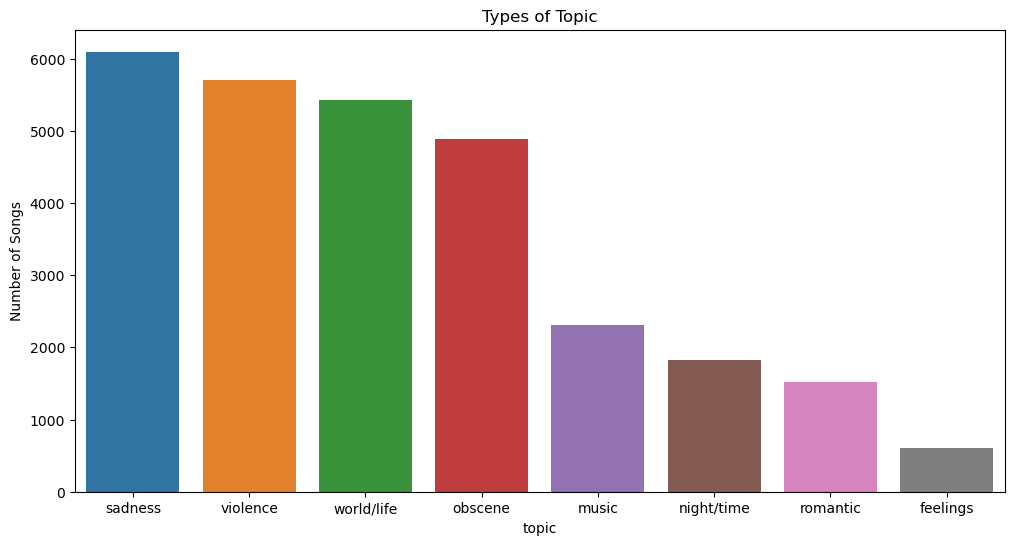

In [391]:
# Plot types of topic
plt.figure(figsize=(12, 6))
sns.barplot(data=topics, x="topic", y="count", hue="topic")
plt.title("Types of Topic")
plt.ylabel("Number of Songs")
plt.show()

There are 15 lyrical features but only 8 topics which means each feature will fall in one of these 8 topics. Majority of the songs fall in the category sadness, violence, world/life and obscene.

## 2. Bivariate Analysis

How has the genre of music change over the years?

In [392]:
# Group by genre and year 
genre_year = music_df.groupby(["release_date", "genre"]).size().reset_index(name="count")

genre_year

,release_date,genre,count
0,1950,blues,7
1,1950,country,11
2,1950,jazz,23
3,1950,pop,10
4,1951,blues,5
...,...,...,...
426,2019,hip hop,120
427,2019,jazz,51
428,2019,pop,79
429,2019,reggae,58


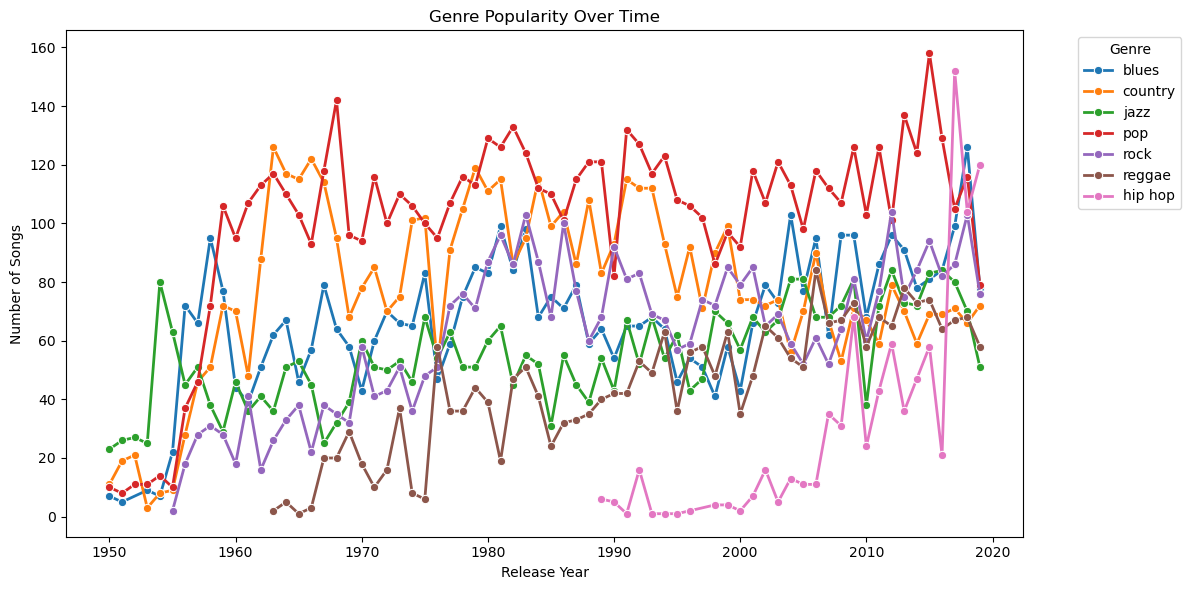

In [393]:
# Plot all genres over the years 
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_year, x="release_date", y="count", hue="genre", marker="o", linewidth=2)

plt.title("Genre Popularity Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Songs")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Genres like jazz and blues were strong in earlier decades but declined. Pop, rock, and country have sustained long-term popularity. Hip hop and reggae entered later but gained significant traction, especially hip hop in recent years.

How has artist songs change over the years?

In [394]:
# Filter the dataset to only include those top 5 artists
top = top_5.index 
top_artist = music_df[music_df["artist_name"].isin(top)]

# Group by artist and year 
artist_year = top_artist.groupby(["release_date", "artist_name"]).size().reset_index(name="count")

artist_year


,release_date,artist_name,count
0,1950,dean martin,10
1,1950,ella fitzgerald,3
2,1951,dean martin,9
3,1951,johnny cash,1
4,1952,dean martin,12
...,...,...,...
139,2013,george jones,1
140,2014,dean martin,5
141,2014,ella fitzgerald,1
142,2015,willie nelson,1


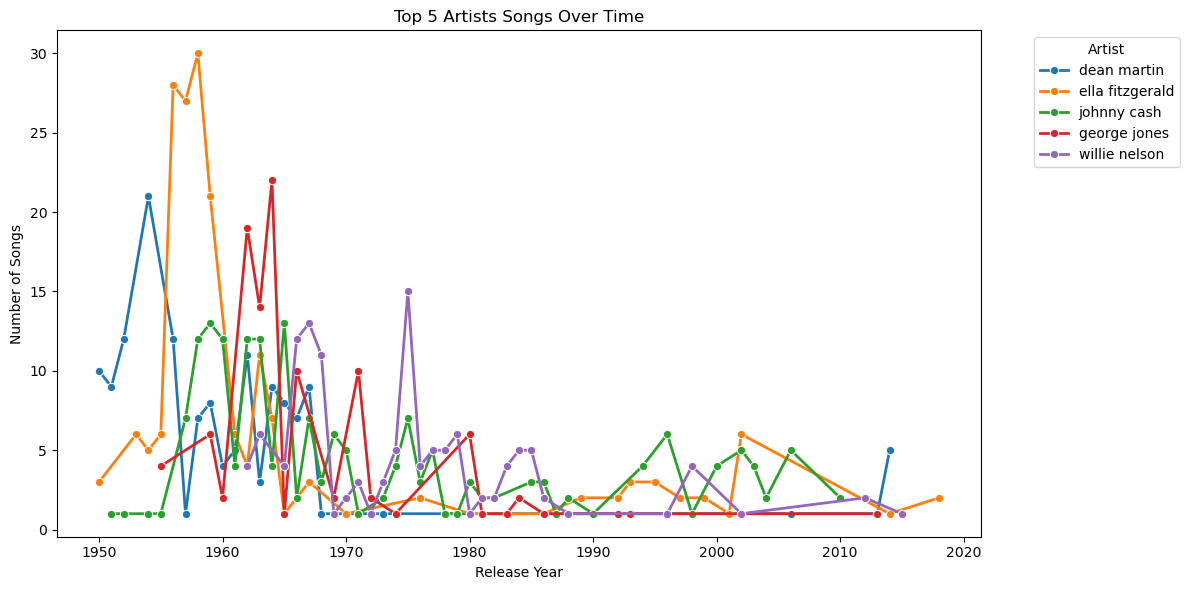

In [395]:
# Plot top 5 artists over the years 
plt.figure(figsize=(12, 6))
sns.lineplot(data=artist_year, x="release_date", y="count", hue="artist_name", marker="o", linewidth=2)
plt.title("Top 5 Artists Songs Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Songs")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Most of these artists had their creative peak in the 1950s–70s. Johnny Cash and Willie Nelson maintained relevance longer than the others, with new releases stretching into the 2000s.

How has song topics change over the years?

In [396]:
# Group by topic and year
topic_year = music_df.groupby(["release_date", "topic"]).size().reset_index(name="count")

topic_year


,release_date,topic,count
0,1950,music,7
1,1950,night/time,4
2,1950,obscene,5
3,1950,romantic,11
4,1950,sadness,9
...,...,...,...
553,2019,obscene,226
554,2019,romantic,8
555,2019,sadness,73
556,2019,violence,96


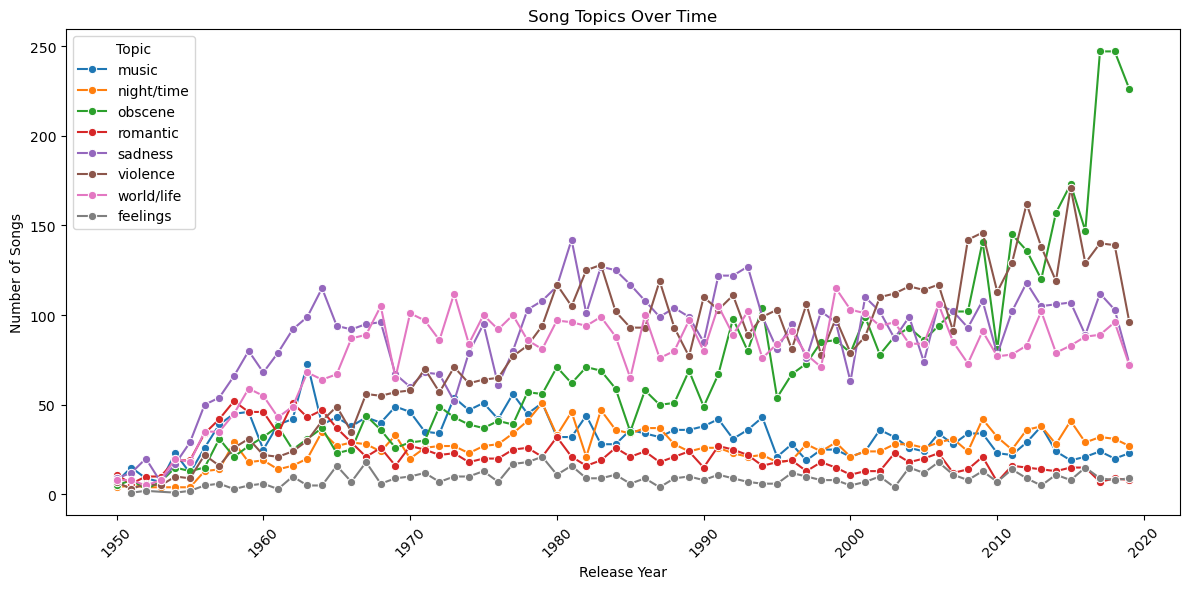

In [397]:
# Plot all topics over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=topic_year, x='release_date', y='count', hue='topic', marker='o')
plt.title("Song Topics Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Songs")
plt.legend(title="Topic")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Music has gotten more explicit (obscene and violent), especially from the 2000s onward. Sadness and world/life issues have stayed important over time.
Romance is steady, but not growing as much as you might expect. There's a clear cultural shifts with more songs about violence and obscenity in the 21st century.

## 3. Multivarite Analysis 

How does the lyrical features effect the genre?

In [398]:
# Will reduce features from 15 to 8 to match the amount of topics. Add len and age
features = ["violence", "world/life", "night/time", "romantic", "obscene", "music", "sadness", "feelings"]

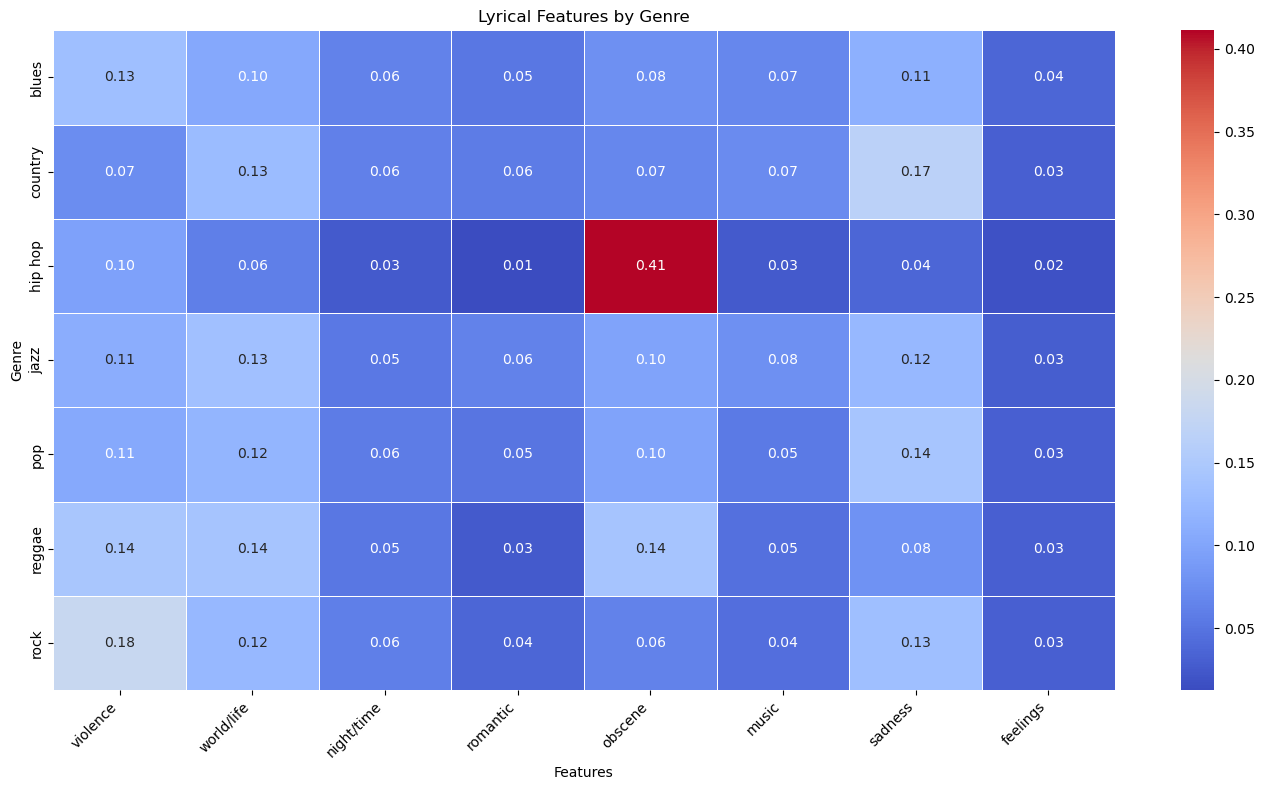

In [399]:
# Group by genre and calculate mean 
genre_features = music_df.groupby("genre")[features].mean()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(genre_features, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Lyrical Features by Genre")
plt.xlabel("Features")
plt.ylabel("Genre")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Hip hop stands out with a very high focus on obscene content (0.41), far higher than any other genre/topic combination. Rock shows the highest association with violence (0.18). Country music shows a relatively higher connection to sadness (0.17). Reggae tends to talk more about world/life (0.14) and obscene content (0.14). Overall, emotional themes like sadness and world/life are moderately present across many genres, but obscene content is extremely concentrated in hip hop.

How does the lyrical features effect the top 5 artists?

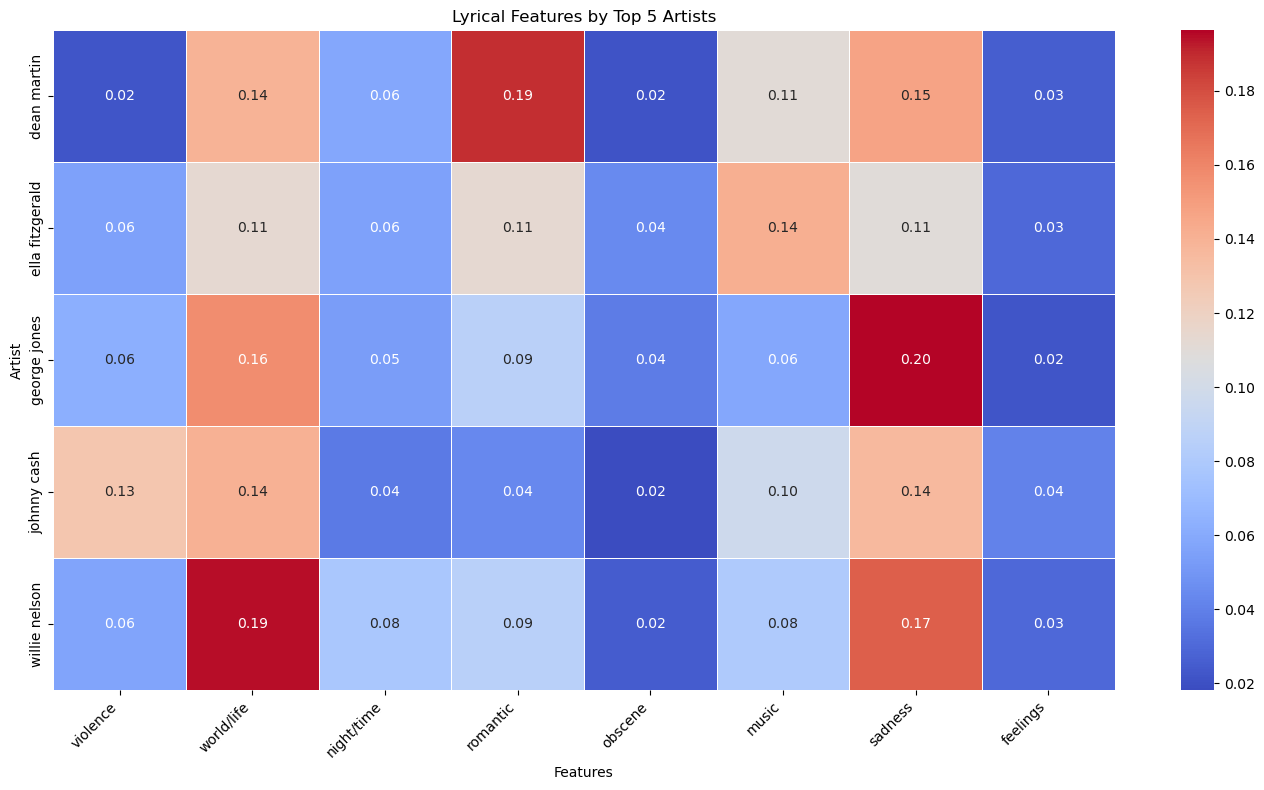

In [400]:
# Group by artist and calculate mean 
artist_features = top_artist.groupby("artist_name")[features].mean()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(artist_features, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Lyrical Features by Top 5 Artists")
plt.xlabel("Features")
plt.ylabel("Artist")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dean Martin has a relatively high use of "romantic" themes (0.19). George Jones has a strong focus on "sadness" (0.20). Willie Nelson uses more "wildlife" references (0.19). Johnny Cash has a noticeable amount of "violence" (0.13). Ella Fitzgerald touches slightly more on "music" (0.14).

What is the correlation between lyrical features, length and age?

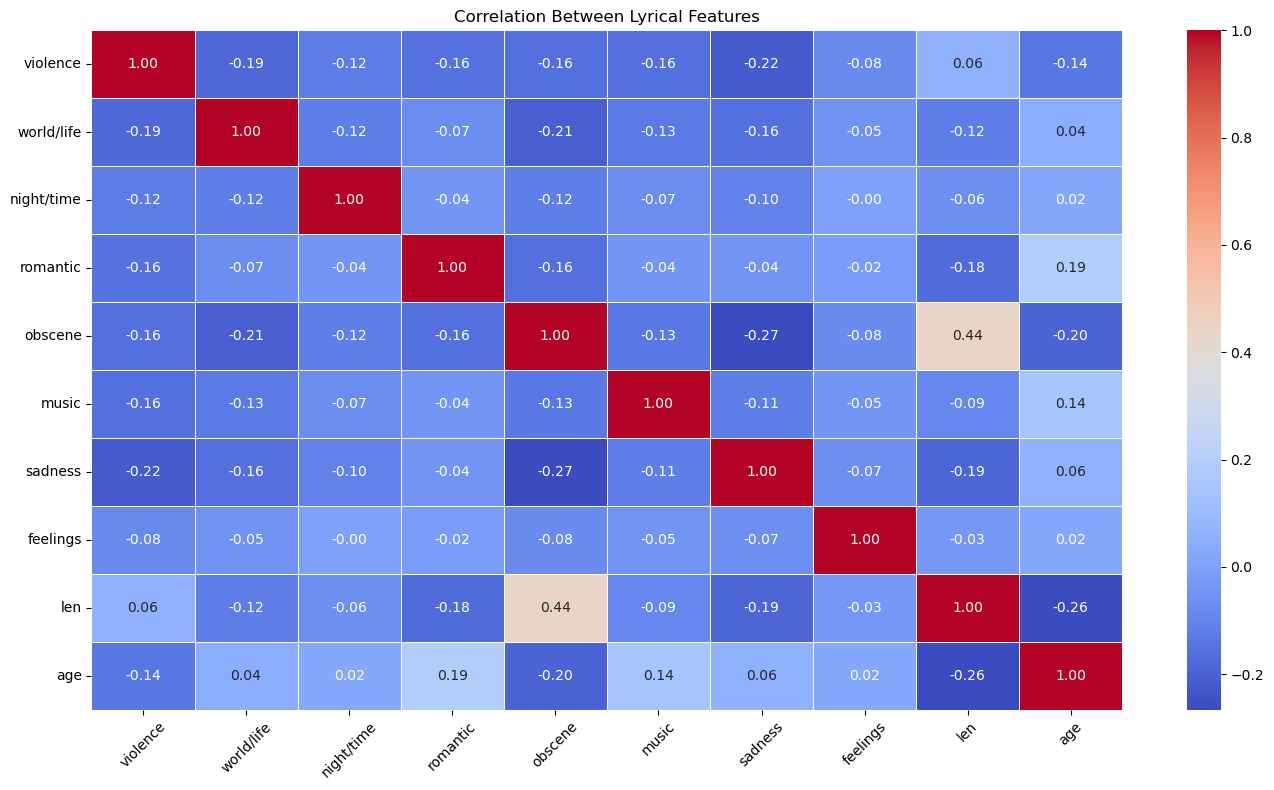

In [401]:
# Select only numerical columns for correlation
features2 = ["violence", "world/life", "night/time", "romantic", "obscene", "music", "sadness", "feelings", "len", "age"]
corr = music_df[features2].corr()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Lyrical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Positive Correlation: Obscene and Length (0.44) suggests longer texts are more likely to include obscene language. Romantic lyrics have a positive correlation with age (0.19), suggesting romantic content may be more common in lyrics related to older artists or themes.

Negative Correlation: Obscene and Sadness (-0.27) suggests more obscene content tend to have less sad content. Len and Age (-0.26) suggest longer songs are associated with younger audiences or artists. Violence is negatively correlated with most features, particularly sadness (-0.22) and world/life (-0.19).

## Hypothesis based off graphs

Songs with higher lyrical obscenity tend to be longer and contain fewer themes of sadness. Additionally obscene content in lyrics is highly genre-specific, with hip hop containing significantly more obscene content than other genres, while emotional themes such as sadness and world/life are more evenly distributed across genres.